In [1]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sy
np.set_printoptions(precision=4)

In [2]:
def set_lims(X,Y,Z, ax):
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0

    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

In [3]:
g = 9.81

def system(states, t):
    i = 0
    x = states[0]
    y = states[1]
    z = states[2] #don't actually end up using this one
    v = states[3]
    theta = states[4]
    
    #calculate tangent vector
    direction = np.array([np.cos(theta), np.sin(theta)])
    T = Jlam(x, y)@direction
    T /= np.linalg.norm(T)
    
    #find angle of ascent
    sin_psi = T[2]
    
    #find all dots
    pdot = v*T
    vdot = u1(t) - g*sin_psi
    thetadot = u2(t)
    return tuple(pdot.flatten()) + (vdot, thetadot)

<IPython.core.display.Javascript object>


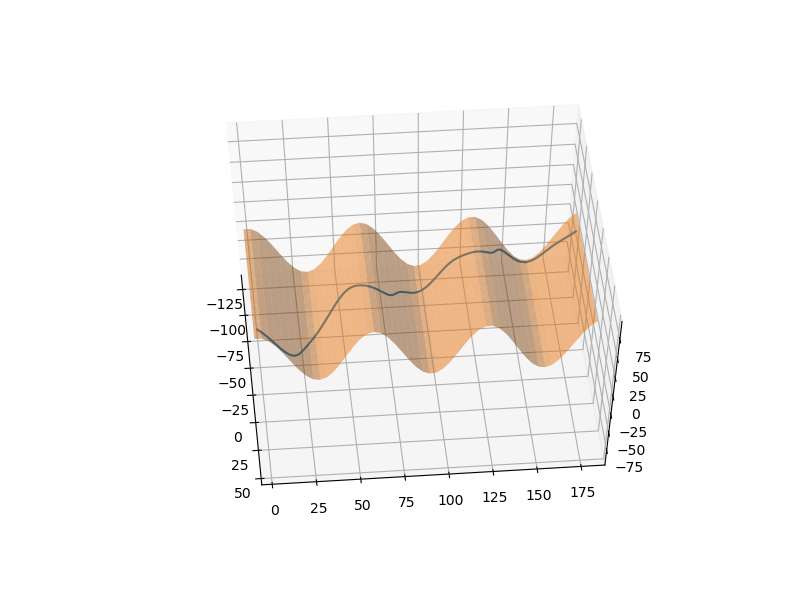

In [8]:
#set up surface
x, y = sy.symbols('x y') 
### CAN CHANGE SURFACE HERE 
M = sy.Matrix([x, y, 30*sy.cos(y/10)])
J = M.jacobian([x,y])
Jlam = sy.lambdify((x,y), J)
Mlam = sy.lambdify((x,y), M)

#set up controls
N = 200
### CAN CHANGE CONTROLS
u1 = lambda t: 0
u2 = lambda t: np.sin(t)
t_array = np.linspace(0, 20, N)

#x0, y0, z0, v0, theta0
y0 = np.array([0, 0, Mlam(0,0)[2,0], 10, np.pi/4])

#solve
sol = odeint(system, y0, t_array)

#plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sol[:,0], sol[:,1], sol[:,2])

x = np.linspace(min(sol[:,0])-2,max(sol[:,0])+2)
y = np.linspace(min(sol[:,1])-2,max(sol[:,1])+2)
X,Y = np.meshgrid(x,y)
Z = Mlam(X,Y)[2,0,:,:]
ax.plot_surface(X,Y,Z, alpha=0.5)
# ax.set_ylim([-20,20])
# ax.set_xlim([-20,20])
set_lims(X, Y, Z, ax)

plt.show()